# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = pd.read_csv('Sequences.csv')

In [3]:
data['Sequence'] = data['Sequence'].progress_apply(eval)

In [4]:
solutions = pd.read_csv('Solutions.csv')

# Subsequence Repetition

In [5]:
from sequences.subsequence_repetition import *

## 1st-11th Order Subsequences

Solving 1 order


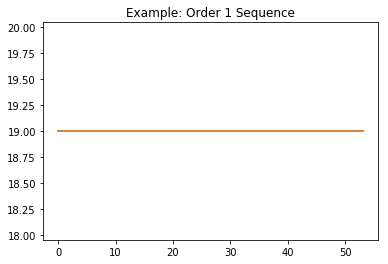


Solved order 1: 35 (0.02%)
Solving 2 order


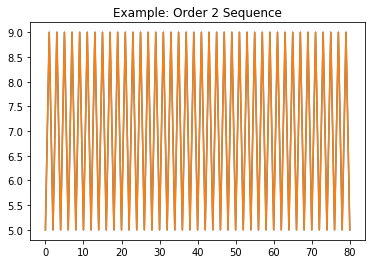


Solved order 2: 119 (0.05%)
Solving 3 order


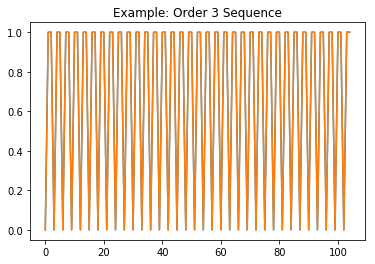


Solved order 3: 99 (0.04%)
Solving 5 order


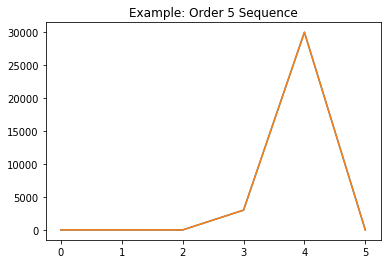


Solved order 5: 163 (0.07%)
Solving 7 order


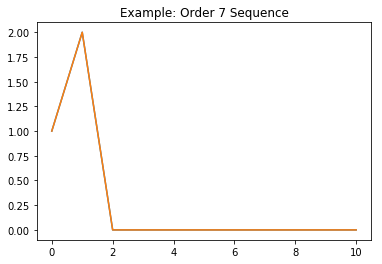


Solved order 7: 151 (0.07%)
Solving 9 order


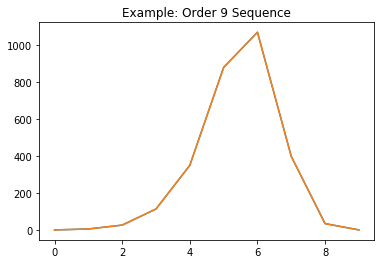


Solved order 9: 287 (0.13%)
Solving 11 order


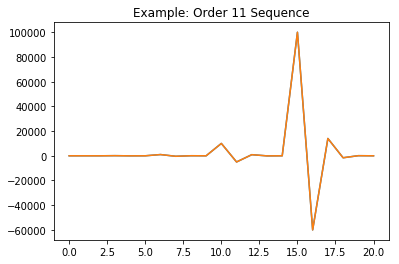


Solved order 11: 181 (0.08%)


In [6]:
for order in [1, 2, 3, 5, 7, 9, 11]:
    print(f'Solving {order} order')
    count = 0
    solutions[f's{order}'] = 0
    for i in trange(len(data['Sequence'])):
        seq = data['Sequence'][i]
        coeff = checkSubsequenceRepetition(seq,order)
        if coeff:
            count += 1
            solutions.loc[i, 'Solved'] = 1
            solutions.loc[i, f's{order}'] = 1
            if count == 1:
                fig, ax = plt.subplots()
                ax.plot(seq)
                plt.plot(seq)
                ax.set_title(f'Example: Order {order} Sequence')
                plt.show()

    print(f'Solved order {order}: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [7]:
solutions.drop(['Id'], axis=1).mean(0).mul(100).round(2).astype(str) + '%'

Solved    34.69%
r10        7.89%
r9         9.34%
r8        10.28%
r7        10.05%
r6         9.06%
r5         8.13%
r4         7.62%
r3         6.68%
r2         4.18%
r1         0.74%
p10        2.08%
p9         2.13%
p8         2.13%
p7         2.09%
p6         2.05%
p5         1.86%
p4          1.7%
p3         1.44%
p2         1.12%
p1         0.56%
t-s        0.23%
t-p        0.17%
t-d        0.05%
t-py       0.04%
misc       6.33%
s1         0.02%
s2         0.05%
s3         0.04%
s5         0.07%
s7         0.07%
s9         0.13%
s11        0.08%
dtype: object

In [8]:
print('linear recurrence relations', round(solutions[[f'r{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')
print('polynomial sequences', round(solutions[[f'p{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')
print('triplets', round(solutions[['t-s', 't-p', 't-d', 't-py']].max(axis=1).mean() * 100, 2), '%')
print('miscellaneous', round(solutions[['misc']].max(axis=1).mean() * 100, 2), '%')
print('subsequence repetition', round(solutions[[f's{i}' for i in [1, 2, 3, 5, 7, 9, 11]]].max(axis=1).mean() * 100, 2), '%')

linear recurrence relations 28.64 %
polynomial sequences 2.58 %
triplets 0.4 %
miscellaneous 6.33 %
subsequence repetition 0.32 %


In [9]:
solutions.to_csv('Solutions.csv', index=False)